In [1]:
import requests

In [2]:
host = "https://b6b1fe17-4020-4f88-867f-48004baa1058.deepnoteproject.com"
mac_address = '0xe45f01d8f467'

In [3]:
# Check the service status
response = requests.get(host + '/status')
if response.status_code == 200:
    status = response.json()['status']
    print(f'The server is {status}.')
else:
    print('The server is offline.')
    exit()

The server is online.


In [4]:
# The "requests" package will handle the conversion to JSON internally.
payload = {'mac_address': mac_address}
# Specify the request body with "json" argument of the post method.
response_sensors = requests.post(host + '/sensors', json=payload)

# Check the response code. The expected value is 200.
if response_sensors.status_code == 200:
    print('Sensor timeseries added.')
else:
    print(response_sensors.status_code, response_sensors.reason)
    print("The device already exists")


409 Conflict
The device already exists


In [5]:
# ---- DEBUGGING ----
# Print the list of all sensors
response = requests.get(host + '/sensors')
if response.status_code == 200:
    data = response.json()
    print(data['sensors'])
else:
    print(response.status_code, response.text)


# Verify this sensor exists
response = requests.get(host + f'/sensor/{mac_address}')
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(response.status_code, response.text)


400 Nothing is running on port 8080
{'mac_address': '0xe45f01d8f467', 't_samples': 36, 't_retention': 86400000, 'h_samples': 36, 'h_retention': 86400000}


In [6]:
payload={'start_date' : '2020-01-01', 'end_date': '2028-04-10'}
response = requests.get(host + f'/data/{mac_address}', params=payload)

if response.status_code == 200:
    data = response.json()
    timestamps = data['timestamps']
    temperatures = data['temperature']
    humidities = data['humidity']

else:
    print(response.status_code, response.reason, response.text)
    exit()

from datetime import datetime
times = [datetime.fromtimestamp(ts/1000) for ts in timestamps]

In [7]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


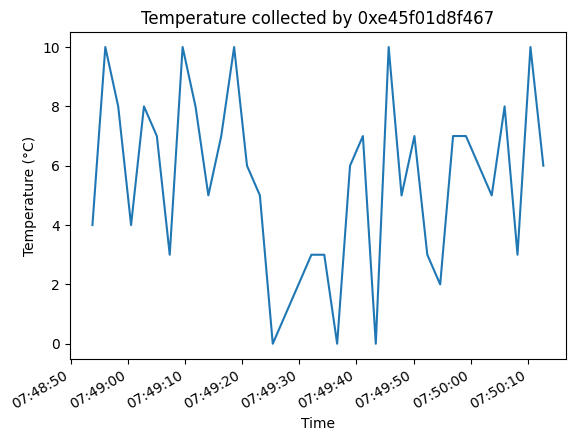

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

TIME_FORMAT = '%H:%M:%S' # This is to be change depending on the range of time we expect. 
# TIME_FORMAT = '%D' # Use this format if the data are collected over multiple days

plt.plot(times, temperatures)
plt.title(f'Temperature collected by {mac_address}')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(TIME_FORMAT))
plt.gcf().autofmt_xdate()

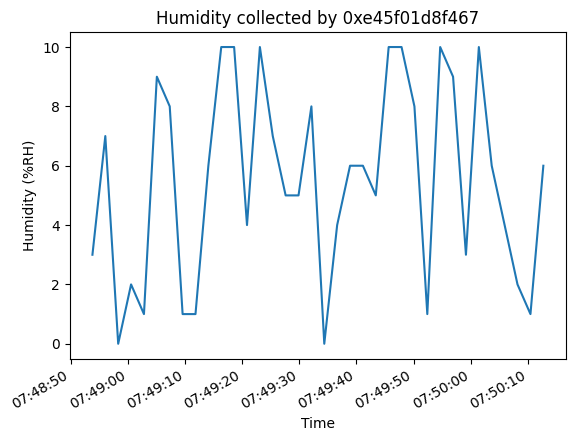

In [14]:
plt.plot(times, humidities)
plt.title(f'Humidity collected by {mac_address}')
plt.xlabel('Time')
plt.ylabel('Humidity (%RH)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(TIME_FORMAT)) # Set the format of x ticks
plt.gcf().autofmt_xdate() # Rotate the dates to avoid overlapping

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b6b1fe17-4020-4f88-867f-48004baa1058' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>